In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['monkey_labels.txt', 'validation', 'training']


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

1.13.1
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.3
pandas 0.23.4
sklearn 0.20.3
tensorflow 1.13.1
tensorflow._api.v1.keras 2.2.4-tf


In [3]:
train_dir = "../input/training/training"
valid_dir = "../input/validation/validation"
label_file = "../input/monkey_labels.txt"
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
True
True
['n3', 'n5', 'n2', 'n4', 'n8', 'n9', 'n6', 'n0', 'n1', 'n7']
['n3', 'n5', 'n2', 'n4', 'n8', 'n9', 'n6', 'n0', 'n1', 'n7']


In [4]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label        ...          Validation Images
0  n0           ...                         26
1  n1           ...                         28
2  n2           ...                         27
3  n3           ...                         30
4  n4           ...                         26
5  n5           ...                         28
6  n6           ...                         26
7  n7           ...                         28
8  n8           ...                         27
9  n9           ...                         26

[10 rows x 5 columns]


In [5]:
height = 224
width = 224
channels = 3
batch_size = 24
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1097 272


In [6]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(24, 224, 224, 3) (24, 10)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

In [7]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False,
                                                   pooling = 'avg',
                                                   weights = 'imagenet'))
resnet50_fine_tune.add(keras.layers.Dense(num_classes, activation = 'softmax'))
resnet50_fine_tune.layers[0].trainable = False

resnet50_fine_tune.compile(loss="categorical_crossentropy",
                           optimizer="sgd", metrics=['accuracy'])
resnet50_fine_tune.summary()

Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
epochs = 10
history = resnet50_fine_tune.fit_generator(train_generator,
                                           steps_per_epoch = train_num // batch_size,
                                           epochs = epochs,
                                           validation_data = valid_generator,
                                           validation_steps = valid_num // batch_size)

Epoch 1/10
46/46 [==============================] - 49s 1s/step - loss: 0.1138 - acc: 0.9809 - val_loss: 0.1107 - val_acc: 0.9853
Epoch 2/10
46/46 [==============================] - 40s 877ms/step - loss: 0.1232 - acc: 0.9772 - val_loss: 0.0993 - val_acc: 0.9816
Epoch 3/10
46/46 [==============================] - 40s 879ms/step - loss: 0.1087 - acc: 0.9809 - val_loss: 0.1035 - val_acc: 0.9853
Epoch 4/10
46/46 [==============================] - 41s 886ms/step - loss: 0.1068 - acc: 0.9872 - val_loss: 0.1029 - val_acc: 0.9816
Epoch 5/10
46/46 [==============================] - 40s 862ms/step - loss: 0.1007 - acc: 0.9836 - val_loss: 0.1072 - val_acc: 0.9853
Epoch 6/10
46/46 [==============================] - 41s 883ms/step - loss: 0.1086 - acc: 0.9781 - val_loss: 0.0949 - val_acc: 0.9853
Epoch 7/10
46/46 [==============================] - 40s 869ms/step - loss: 0.1195 - acc: 0.9690 - val_loss: 0.0920 - val_acc: 0.9853
Epoch 8/10
46/46 [==============================] - 40s 880ms/step - los

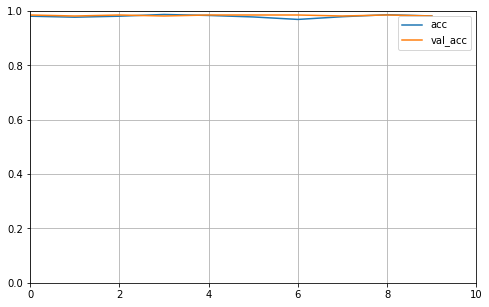

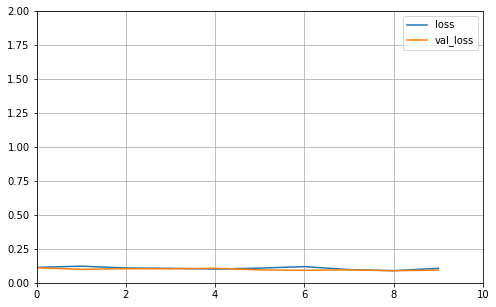

In [10]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'acc', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [11]:
resnet50 = keras.applications.ResNet50(include_top = False,
                                       pooling = 'avg',
                                       weights = 'imagenet')
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
for layer in resnet50.layers[0:-5]:
    layer.trainable = False

resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes, activation = 'softmax'),
])
resnet50_new.compile(loss="categorical_crossentropy",
                     optimizer="sgd", metrics=['accuracy'])
resnet50_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 1,075,210
Non-trainable params: 22,532,992
_________________________________________________________________


In [13]:
epochs = 10
history = resnet50_new.fit_generator(train_generator,
                                     steps_per_epoch = train_num // batch_size,
                                     epochs = epochs,
                                     validation_data = valid_generator,
                                     validation_steps = valid_num // batch_size)

Epoch 1/10
46/46 [==============================] - 46s 989ms/step - loss: 1.3628 - acc: 0.6153 - val_loss: 0.5398 - val_acc: 0.8640
Epoch 2/10
46/46 [==============================] - 40s 866ms/step - loss: 0.5323 - acc: 0.9006 - val_loss: 0.2413 - val_acc: 0.9485
Epoch 3/10
46/46 [==============================] - 40s 878ms/step - loss: 0.3375 - acc: 0.9508 - val_loss: 0.1910 - val_acc: 0.9559
Epoch 4/10
46/46 [==============================] - 40s 878ms/step - loss: 0.2672 - acc: 0.9535 - val_loss: 0.1562 - val_acc: 0.9596
Epoch 5/10
46/46 [==============================] - 40s 871ms/step - loss: 0.2336 - acc: 0.9544 - val_loss: 0.1544 - val_acc: 0.9449
Epoch 6/10
46/46 [==============================] - 40s 869ms/step - loss: 0.1926 - acc: 0.9717 - val_loss: 0.1322 - val_acc: 0.9596
Epoch 7/10
46/46 [==============================] - 40s 866ms/step - loss: 0.1700 - acc: 0.9708 - val_loss: 0.1235 - val_acc: 0.9559
Epoch 8/10
46/46 [==============================] - 40s 869ms/step - 

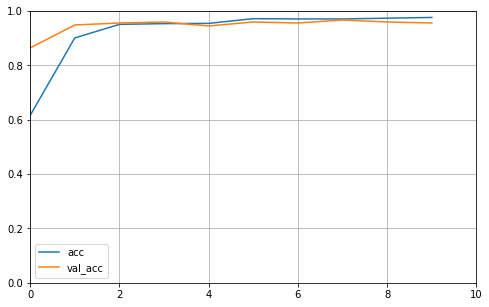

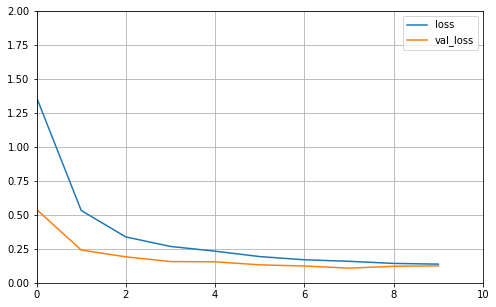

In [14]:
plot_learning_curves(history, 'acc', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)